# Analyse des résultats de NEDUM

## Setup

In [35]:
pip install contextily

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Importation des données

In [37]:
outNedum = pd.read_csv('output_NEDUM.csv', sep = ',')
# outNedum.head(5)
print(outNedum.columns)

Index(['Unnamed: 0', 'X', 'Y', 'simul_2008_etat_initial_loyer',
       'simul_2008_etat_initial_logement', 'simul_2008_etat_initial_taille',
       'simul_2008_etat_initial_emissions', 'simul_2030_sc1_BAU_loyer',
       'simul_2030_sc1_BAU_logement', 'simul_2030_sc1_BAU_taille',
       'simul_2030_sc1_BAU_emissions', 'simul_2030_sc3_ZI_loyer',
       'simul_2030_sc3_ZI_logement', 'simul_2030_sc3_ZI_taille',
       'simul_2030_sc3_ZI_emissions', 'simul_2030_sc4_CV_loyer',
       'simul_2030_sc4_CV_logement', 'simul_2030_sc4_CV_taille',
       'simul_2030_sc4_CV_emissions', 'simul_2030_sc2_TU_loyer',
       'simul_2030_sc2_TU_logement', 'simul_2030_sc2_TU_taille',
       'simul_2030_sc2_TU_emissions', 'simul_2030_sc5_mix_loyer',
       'simul_2030_sc5_mix_logement', 'simul_2030_sc5_mix_taille',
       'simul_2030_sc5_mix_emissions', 'coeff_land', 'part_inond',
       'distance_centre'],
      dtype='object')


### Configuration de la carte

<Axes: title={'center': 'Construction Map'}, xlabel='X', ylabel='Y'>

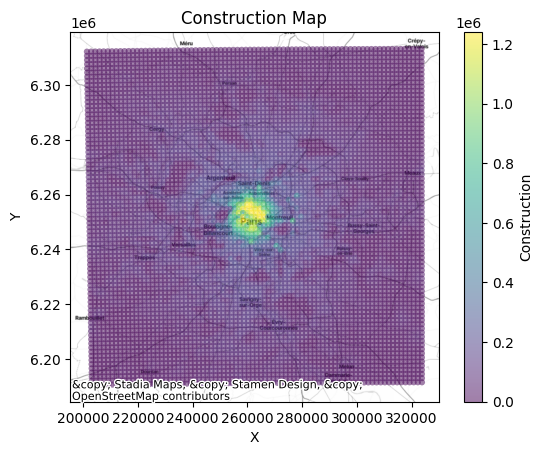

In [38]:
import geopandas
import contextily as ctx
from shapely.geometry import Point #pour faire des cartes

# Pour tracer une carte avec un fond de carte

# fonction qui trace une carte
def carto(variable=outNedum['coeff_land'],X=outNedum['X'],Y=outNedum['Y'], labelx="", labely="", title="", colorbar_label=""):
    # creation d'un geodataframe (pour afficher comme une carte)
    # 1. on cree les infos spatiales
    geometry = [Point(xy) for xy in zip(X, Y)]
    # 2. on cree le dataframe a transformer en geodataframe
    data_frame_temp=pd.concat([X,Y,pd.Series(variable)], axis=1)
    # 3. on le convertit en geodataframe
    geodata_frame_temp = geopandas.GeoDataFrame(data_frame_temp, geometry=geometry)

    # on fixe le bon système de coordonnées
    # CRS = coordinate reference system (cf. https://en.wikipedia.org/wiki/Spatial_reference_system)
    # le CRS 2154 c'est le système de référence de l'IGN pour les cartes autour de Paris
    geodata_frame_temp.crs = "EPSG:2154"
    # on convertit dans le système de coordonnées utilisé par Google Map et Open Street Map (nécessaire pour ajouter automatiquement un fond de crte)
    geodata_frame_temp=geodata_frame_temp.to_crs(epsg=3857)

    # on trace la carte
    ax=geodata_frame_temp.plot(column=geodata_frame_temp.columns[2],
              alpha=0.5,
              edgecolor="None",
              legend=False, # Set to False to control colorbar manually
              marker='o',
              s=20)
    # Create colorbar explicitly and set its label
    cbar = plt.colorbar(ax.collections[0], ax=ax)
    cbar.set_label(colorbar_label)

    # on ajoute un fond de carte: le fond Stamen Toner (https://wiki.openstreetmap.org/wiki/Stamen)
    API_KEY = "c1b34603-a39b-4962-a98d-610a31b20dd2"
    ctx.add_basemap(
    ax,
    source=f"https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{{z}}/{{x}}/{{y}}.png?api_key={API_KEY}",
    attribution="&copy; Stadia Maps, &copy; Stamen Design, &copy; OpenStreetMap contributors",
    alpha=1
    )
    # Set labels and title
    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    ax.set_title(title)
    # ax.set_axis_off()
    return ax

#pour fermer les autres figures
plt.close('all')

#exemple d'utilisation
carto(
  outNedum['simul_2030_sc3_ZI_logement'] * outNedum['coeff_land'],
  labelx="X",
  labely="Y",
  title="Construction Map",
  colorbar_label="Construction"
  )

In [39]:
print(outNedum.columns)

Index(['Unnamed: 0', 'X', 'Y', 'simul_2008_etat_initial_loyer',
       'simul_2008_etat_initial_logement', 'simul_2008_etat_initial_taille',
       'simul_2008_etat_initial_emissions', 'simul_2030_sc1_BAU_loyer',
       'simul_2030_sc1_BAU_logement', 'simul_2030_sc1_BAU_taille',
       'simul_2030_sc1_BAU_emissions', 'simul_2030_sc3_ZI_loyer',
       'simul_2030_sc3_ZI_logement', 'simul_2030_sc3_ZI_taille',
       'simul_2030_sc3_ZI_emissions', 'simul_2030_sc4_CV_loyer',
       'simul_2030_sc4_CV_logement', 'simul_2030_sc4_CV_taille',
       'simul_2030_sc4_CV_emissions', 'simul_2030_sc2_TU_loyer',
       'simul_2030_sc2_TU_logement', 'simul_2030_sc2_TU_taille',
       'simul_2030_sc2_TU_emissions', 'simul_2030_sc5_mix_loyer',
       'simul_2030_sc5_mix_logement', 'simul_2030_sc5_mix_taille',
       'simul_2030_sc5_mix_emissions', 'coeff_land', 'part_inond',
       'distance_centre'],
      dtype='object')


# Questions

## Effet de la tarification des transports en commun

### 1. Décrire l’effet attendu théoriquement d’un passage d’une tarification des transports en commun par zone où le prix de l’abonnement augmente lorsqu’on s’éloigne du centre à un tarif unique (effet sur les modes de transport et effet sur la structure de la ville).

Le passage des transports en commun d'une tarification par zone à prix croissant avec l'éloignement au centre vers une tarification unique a plusieurs effets. D'abord la tarification unique réduit, relativement à la tarification par zone, le prix des transport en communs en périphérie, et cet effet est d'autant plus significatif que l'on s'éloigne du centre. Cela signifie des transport plus accessibles à distance du centre, et donc une réduction relative de l'importance de vivre proche du centre. Ainsi, passer à une tarification unique vient faire prendre de la valeur au foncier en périphérie du centre, d'autant plus que ce foncier est proche des arrêts de transport. Au contraire, les logements du centre eux perdent en valeur avec ce changement de tarification car il devient relativement moins intéressant de se loger au centre avec des transports moins couteux en périphérie (et relativement plus couteux au centre).

Cette tarification uniques, qui rend donc plus attractif la périphérie, induit aussi en conséquence un étalement urbain plus important qu'avec la tarification par zone.

### 2. La densité de population (en nombre de ménages / km2) dans chaque carré de grille s’obtient en divisant la quantité de logement construit par la taille moyenne des logements pour un ménage. Tracer une carte de la comparaison de la densité de population pour le scénario 1 (BAU) et le scénario 2 (Tarif unique). Idem pour la construction (en multipliant par ‘coeff_land ‘). Quel est l’impact du tarif unique sur l’étalement urbain ? Est-ce l’effet attendu ?

<Axes: title={'center': 'Comparaison de la densité de ménages TU vs BAU'}, xlabel='X', ylabel='Y'>

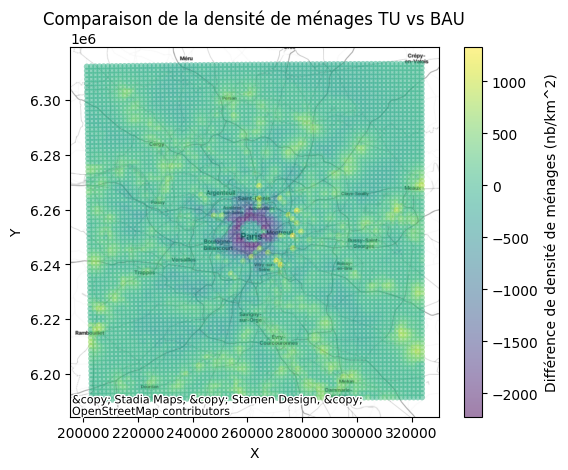

In [40]:
simul_2030_sc1_BAU_density = outNedum["simul_2030_sc1_BAU_logement"]*outNedum["coeff_land"]/outNedum["simul_2030_sc1_BAU_taille"]
simul_2030_sc2_TU_density = outNedum["simul_2030_sc2_TU_logement"]*outNedum["coeff_land"]/outNedum["simul_2030_sc2_TU_taille"]
density_diff_sc2_sc1 = simul_2030_sc2_TU_density - simul_2030_sc1_BAU_density
carto(density_diff_sc2_sc1, labelx="X", labely="Y", title="Comparaison de la densité de ménages TU vs BAU", colorbar_label="Différence de densité de ménages (nb/km^2)")

Comme vu théoriquement, la densité de population augmente dans la périphérie éloignée du centre, d'autant plus que l'on est proche des stations de transport (visibles par les disques de forte augmentation de la densité de population).

Dans la petite couronne, la densité diminue car comme vu précédement, les zones proches du centre deviennent moins attractives avec le tarif unique. Cependant, l'immobilier du centre de Paris étant saturé (la hauteur limité des batîments fait que la densité est plus faible quelle ne le serait sur un marché plus libre), on observe pas de différence en densité de population pour Paris intra-muros, et ce malgré la baisse d'attractivité relativement à la périphérie éloignée.

<Axes: title={'center': 'Comparaison de la construction TU vs BAU'}, xlabel='X', ylabel='Y'>

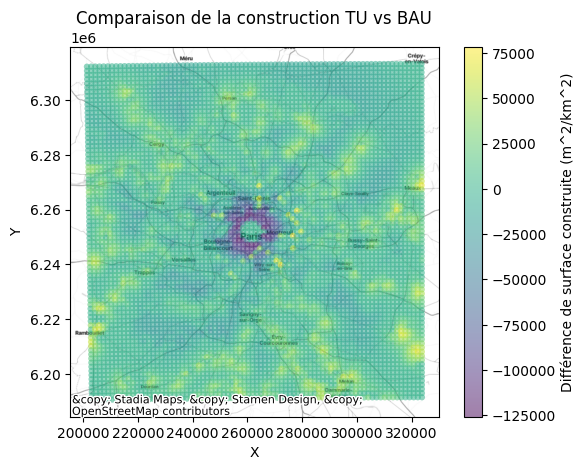

In [41]:
construction_diff_sc2_sc1 = (outNedum["simul_2030_sc2_TU_logement"] - outNedum["simul_2030_sc1_BAU_logement"])*outNedum["coeff_land"]
carto(construction_diff_sc2_sc1, labelx="X", labely="Y", title="Comparaison de la construction TU vs BAU", colorbar_label="Différence de surface construite (m^2/km^2)") #logement nb de m^2 sans restriction

On observe que l'augmentation de la densité de population en périphérie éloignée de Paris et directement liée à une hausse de la construction dans ces mêmes zones.

Ainsi, il y a plus de constrution dans les zones éloignées du centre, et ce d'autant plus qu'elles sont proches d'arrêts de transport. On contraire, dans la petite couronne on observe moins de constructions. Et pour Paris intra-muros, aucun changement n'est observé par saturation du marché.

On en déduit que le tarif unique favorise l'étalement urbain.

### 3. Que prédit NEDUM-2D sur l’impact de la tarification unique des transports sur les émissions de gaz à effet de serre liées au déplacement domicile-travail ? Pourquoi ?

-2809692012057.301 geqCO2 en moins en 2030


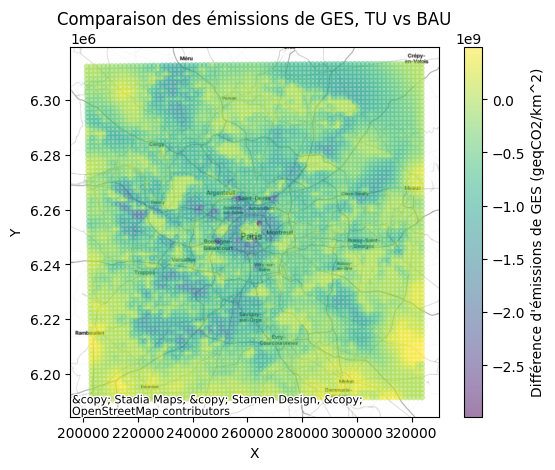

In [42]:
#emission par année pour un ménage vivant dans le pixel en question
emission_diff_sc2_sc1 = outNedum["simul_2030_sc2_TU_emissions"]*simul_2030_sc2_TU_density - outNedum["simul_2030_sc1_BAU_emissions"]*simul_2030_sc1_BAU_density
carto(emission_diff_sc2_sc1, labelx="X", labely="Y", title="Comparaison des émissions de GES, TU vs BAU", colorbar_label="Différence d'émissions de GES (geqCO2/km^2)")
sum_emissions_diff_sc2_sc1 = np.sum(emission_diff_sc2_sc1)
print(f"{sum_emissions_diff_sc2_sc1} geqCO2 en moins en 2030")

<Axes: title={'center': 'Comparaison des émissions de GES, TU vs BAU'}, xlabel='X', ylabel='Y'>

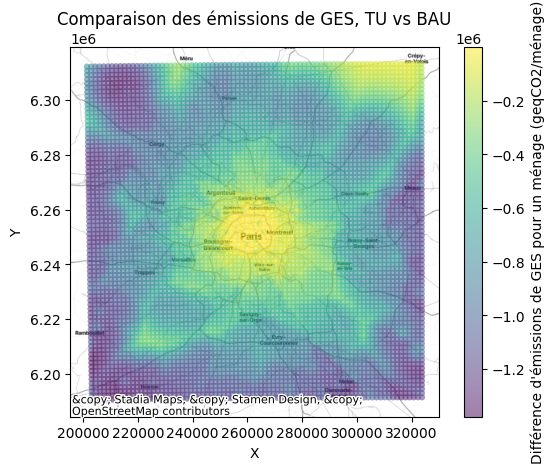

In [43]:
#emission par année pour un ménage vivant dans le pixel en question
emission_diff_sc2_sc1 = outNedum["simul_2030_sc2_TU_emissions"] - outNedum["simul_2030_sc1_BAU_emissions"]
carto(emission_diff_sc2_sc1, labelx="X", labely="Y", title="Comparaison des émissions de GES, TU vs BAU", colorbar_label="Différence d'émissions de GES pour un ménage (geqCO2/ménage)")

On regarde ici la variation d'émissions de GES par ménage pour isoler l'effet qu'à la TU sur ces dernières.

La mise en place d'une tarrification unique pour les transports en communs rends ces derniers plus attractifs (d'autant plus pour une personne éloignée du centre), et donc augmente leur utilisation. Cela a pour effet de réduire les émissions de gaz à effets de serre par ménage sur l'ensemble du territoire. La réduction est plus important quand on s'éloigne du centre, car la tarrification unique avantage économiquement ceux qui habitent le plus loin, ils sont donc d'avantage poussés à utiliser les transports en communs.

Pour les personnes se déplaçant dans Paris, la tarification unique est désavantageuse, mais les transports restent attractifs et on n'observe aucun effet significatif sur les émissions de GES par ménage.

Au total, la TU permet une réduction de 2.8 millions de Tonnes de CO2eq comparé à BAU.

### 4. Tracer une carte de la différence des loyers entre scénario BAU et scénario avec tarif unique. Discuter de l’équité d’une telle mesure.

<Axes: title={'center': 'Comparaison des loyers, TU vs BAU'}, xlabel='X', ylabel='Y'>

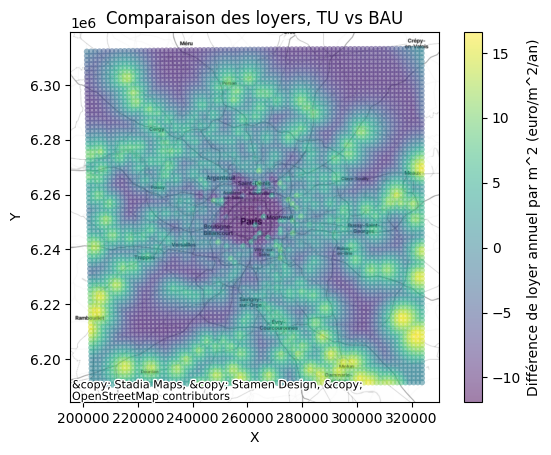

In [44]:
loyer_diff_sc2_sc1 = outNedum["simul_2030_sc2_TU_loyer"] - outNedum["simul_2030_sc1_BAU_loyer"]
carto(loyer_diff_sc2_sc1, labelx="X", labely="Y", title="Comparaison des loyers, TU vs BAU", colorbar_label="Différence de loyer annuel par m^2 (euro/m^2/an)")

On observe une diminution des loyers dans le centre, et une augmentation des loyers à proximités des stations de transports en communs en prériphérie (le long des axes de transport). En effet, les coûts de transports depuis les périphéries vers le centre étant relativement moins cher dans le cadre de la tariffication unique, il y a moins d'intêret économique à vivre dans le centre ou proche du centre. Les transports en communs étant plus attractifs en périphérie, l'interêt de vivre à proximités des gares est lui renforcé, d'ou l'augmentation des loyers autours d'elles.

Du point de vue de l'équité, une double lecture est possible. La tarification unique permet de diminuer les inégalités de loyer entre le centre et les périphéries, mais avantage le propriétaires de logements proche des gares allant vers le centre, au détriment des autres propriétaires. En effet, les prix des loyers chutent dans le centre mais aussi dans les lieux loin du centre et loin des gares.

## Interdiction de construire dans les zones inondables

### 1. En théorie, interdire de construire dans les zones inondables permet de limiter le nombre de logements exposés aux inondations. Quantifier cet effet dans NEDUM-2D en comparant le nombre de logements en zone inondable dans le scénario 3 par rapport au scénario BAU (sc1).

<Axes: title={'center': 'Zones inondables'}, xlabel='X', ylabel='Y'>

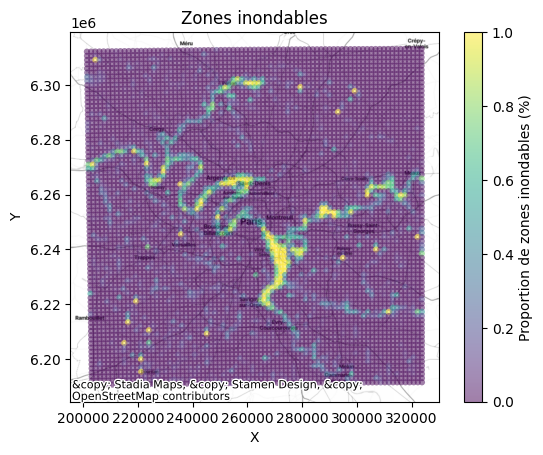

In [45]:
carto(outNedum["part_inond"], labelx="X", labely="Y", title="Zones inondables", colorbar_label="Proportion de zones inondables (%)") #logement nb de m^2 sans restriction

<Axes: title={'center': 'Comparaison de la construction en zone inondable, ZI vs BAU'}, xlabel='X', ylabel='Y'>

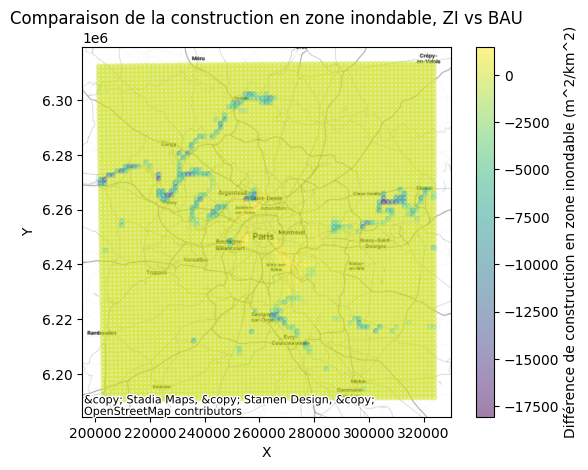

In [46]:
construction_diff_sc3_sc1 = (outNedum["simul_2030_sc3_ZI_logement"] - outNedum["simul_2030_sc1_BAU_logement"])*outNedum["coeff_land"]*outNedum["part_inond"]
carto(construction_diff_sc3_sc1, labelx="X", labely="Y", title="Comparaison de la construction en zone inondable, ZI vs BAU", colorbar_label="Différence de construction en zone inondable (m^2/km^2)")

In [47]:
sum_construction_diff_sc3_sc1 = np.sum(construction_diff_sc3_sc1)
print(f"{sum_construction_diff_sc3_sc1} m^2 en moins en zone inondable")

-1081510.4412077102 m^2 en moins en zone inondable


On observe une baisse des logements en zones inondables le long de la Seine, mais cette baisse reste assez limitée (seulement 1km^2). Ceci s'explique par le fait que la plupart des zones inondables on déjà été construites, et donc l'interdiction ne concerne pas beaucoup de logements supplémentaires. Cette interdiction a par ailleurs plus d'impact en périphérie, là où les zones inondables sont pour le moment moins urbanisées.



<Axes: title={'center': 'Filtre sur les augmentations de logements en zones inondables, ZI vs BAU'}, xlabel='X', ylabel='Y'>

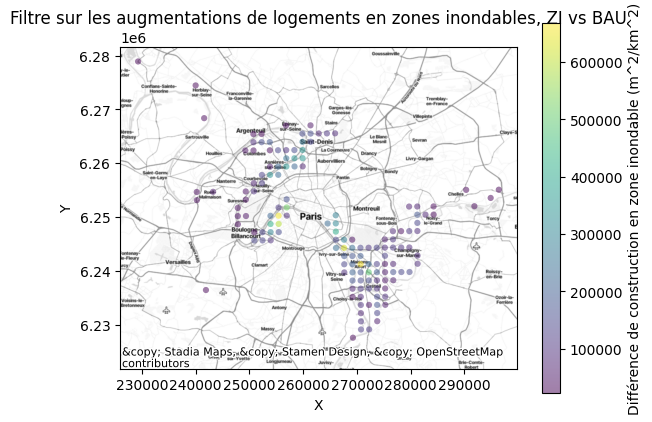

In [48]:
basic_filtered_on_anomaly = outNedum["simul_2030_sc1_BAU_logement"][construction_diff_sc3_sc1 > 100]*outNedum["coeff_land"]*outNedum["part_inond"]
carto(basic_filtered_on_anomaly, labelx="X", labely="Y", title="Filtre sur les augmentations de logements en zones inondables, ZI vs BAU", colorbar_label="Différence de construction en zone inondable (m^2/km^2)")

On observe pour certaines zones une hausse des logements en zones inondable malgré l'interdiction. Cette hausse est due à la précision du modèle : en réalité ces nouveaux logements ne sont pas en zones inondables mais dans une maille où une partie de la zone est inondable.

### 2.Tracer une carte de la différence de loyers due à l’interdiction de construire dans les zones inondables. Comment expliquez-vous ces résultats ?

<Axes: title={'center': 'Comparaison des loyers, ZI vs BAU'}, xlabel='X', ylabel='Y'>

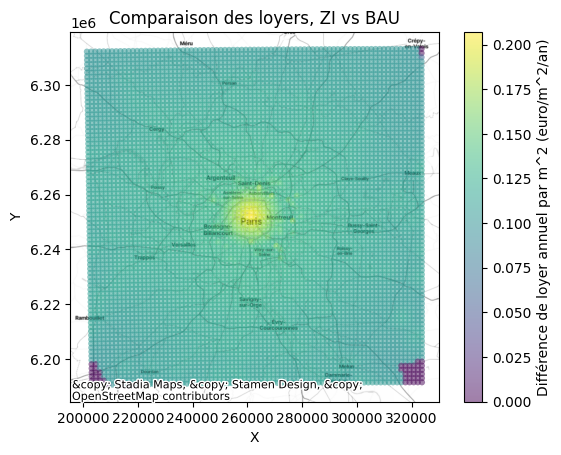

In [49]:
loyer_diff_sc3_sc1 = outNedum["simul_2030_sc3_ZI_loyer"] - outNedum["simul_2030_sc1_BAU_loyer"]
carto(loyer_diff_sc3_sc1, labelx="X", labely="Y", title="Comparaison des loyers, ZI vs BAU", colorbar_label="Différence de loyer annuel par m^2 (euro/m^2/an)")

On observe une faible augmentation globale des loyers, d'autant plus importante qu'on se trouve proche du centre. En effet, l'interdiction de construire en zone inondable réduit la surface totale des logements, faisant mécaniquement augmenter les prix.
De plus, le centre étant déjà saturé, la diminution de surface habitable dans le centre entraine une plus haute hausse des prix.

## Effet de la ceinture verte

### 1. Calculer la surface totale urbanisée dans le scénario avec ceinture verte (sc4) et le comparer au scénario de référence (sc1). Idem pour les émissions de gaz à effet de serre. Conclure sur les avantages de la ceinture verte.

In [50]:
construction_diff_sc4_sc1 = (outNedum["simul_2030_sc4_CV_logement"] - outNedum["simul_2030_sc1_BAU_logement"])*outNedum["coeff_land"]
carto(construction_diff_sc4_sc1, labelx="X", labely="Y", title="Comparaison de la construction CV vs BAU", colorbar_label="Différence de construction avec la ceinture verte (m^2/km^2)")

<Axes: title={'center': 'Comparaison de la construction CV vs BAU'}, xlabel='X', ylabel='Y'>

In [51]:
sum_construction_diff_sc4_sc1 = np.sum(construction_diff_sc4_sc1)
print(f"{sum_construction_diff_sc4_sc1} m^2 en moins de logements")

La ceinture verte réduit de 9 km^2 la surface de logements, cet effet est particulièrement vrai en périphérie lointaine, là où on construit de manière plus étendue, il y a donc une réduction de l'extension urbaine.

In [ ]:
simul_2030_sc4_CV_density = outNedum["simul_2030_sc4_CV_logement"]*outNedum["coeff_land"]/outNedum["simul_2030_sc4_CV_taille"]
emissions_diff_sc4_sc1 = outNedum["simul_2030_sc4_CV_emissions"]*simul_2030_sc4_CV_density - outNedum["simul_2030_sc1_BAU_emissions"]*simul_2030_sc1_BAU_density
carto(emissions_diff_sc4_sc1, labelx="X", labely="Y", title="Comparaison des émissions de GES, CV vs BAU", colorbar_label="Différence d'émissions de GES (geqCO2/km^2)")

In [ ]:
sum_emissions_diff_sc4_sc1 = np.sum(emissions_diff_sc4_sc1)
print(f"{sum_emissions_diff_sc4_sc1} emissions en moins (geqCO2/km^2)")

La Ceinture verte (CV) n'a aucun effet sur les émissions de GES par ménage dans une zone, mais elle a un effet sur la répartition de ces ménages. Ainsi en regardant les effets sur les émissions totales de GES / km^2 on observe plusieurs effets:


*   Une légère augmentation des émissions de GES à l'intérieur de la ceinture verte.
*   Une forte diminution des émissions de GES à l'extérieur de la ceinture verte.
*   Au global, un réduction d'un million de tonne de GES en 2030, sur l'ensemble du périmètre observé. Ce qui représente une baisse de presque 10% des émissions observées dans le scénario de référence.



La ceinture verte à le double avantage de réduire l'extention urbaine tout en assurant une réduction conséquente des émissions de GES dans la zone observée.

### 2. Estimer le nombre de personnes vivant en zone inondable et comparer au scénario de référence. Expliquer les résultats obtenus. Idem pour le loyer au centre de l’agglomération (le maximum des loyers).

In [ ]:
inond_density_diff_sc4_sc1 = (simul_2030_sc4_CV_density - simul_2030_sc1_BAU_density)*outNedum["part_inond"]
carto(inond_density_diff_sc4_sc1, labelx="X", labely="Y", title="Comparaison de la densité de ménages en zone inondable, CV vs BAU", colorbar_label="Différence de densité de logements (nb/km^2)")

In [ ]:
sum_inond_density_diff_sc4_sc1 = np.sum(inond_density_diff_sc4_sc1)
print(f"{sum_inond_density_diff_sc4_sc1} foyers en plus en zone innondable") #passage densité à nb simple car maille au km^2

L'apparition de la ceinture verte réduit la surface du parc de logement disponible, i.e. induit une hausse générale de la densité de logement. En particulier, la densité augmente (comme ailleurs) dans les zones innondable, d'ou une hausse du nombre de ménages en zone inondable.

In [ ]:
loyer_diff_sc4_sc1 = (outNedum["simul_2030_sc4_CV_loyer"] - outNedum["simul_2030_sc1_BAU_loyer"])
carto(loyer_diff_sc4_sc1, labelx="X", labely="Y", title="Comparaison des loyers CV vs BAU", colorbar_label="Différence de loyer annuel par m^2 (euro/m^2/an)")

In [ ]:
np.max(outNedum["simul_2030_sc4_CV_loyer"]) - np.max(outNedum["simul_2030_sc1_BAU_loyer"])

La ceinture verte implique une augmentation généralisée des loyers sur l'ensemble du périmètre d'étude, augmentation qui culmine au coeur de Paris pour atteindre +5 euro/m^2/an, et +4 euro/m^2/an dans la petite ceinture.

## Mix de politiques

###1. Comparer les résultats pour les émissions de gaz à effet de serre, le loyer au centre de Paris, la surface urbanisée et le nombre de logements en zone inondable pour le scénario avec ceinture verte + tarif unique + interdiction de construire dans les zones inondables (sc5) et pour le scénario BAU.

In [ ]:
simul_2030_sc5_mix_density = outNedum["simul_2030_sc5_mix_logement"]*outNedum["coeff_land"]/outNedum["simul_2030_sc5_mix_taille"]
emissions_diff_sc5_sc1 = outNedum["simul_2030_sc5_mix_emissions"]*simul_2030_sc5_mix_density - outNedum["simul_2030_sc1_BAU_emissions"]*simul_2030_sc1_BAU_density
carto(emissions_diff_sc5_sc1, labelx="X", labely="Y", title="Comparaison des émissions de GES, mix vs BAU", colorbar_label="Différence d'émissions de GES (geqCO2/km^2)")

In [ ]:
sum_emissions_diff_sc5_sc1 = np.sum(emissions_diff_sc5_sc1)
print(f"{sum_emissions_diff_sc5_sc1} emissions en moins (geqCO2/km^2)")

On observe une baisse globale des émissions de 3.4 millions de tonnes équivalentes CO2 sur l'année 2030 pour le mix de politiques en comparaison à la projection de référence. Cette réduction d'émissions de GES représente une diminution de 30% par rapport au scénario de référence.

La réduction des émissions est d'autant plus importante qu'on se trouve loin du centre, car la tarification unique, qui incite d'autant plus les habitants loins du centre à utiliser les transports en communs, favorise les transports en communs qui sont moins émetteurs que les transports individuels. De plus,la einture verte réduit la densité en périphérie lointaine, et donc mécniquement les quantités de GES émises par l'ensemble de ménages éloignés du centre.

Le long des lignes de transports, la réduction est moindre, par effet de combinaison entre l'augmentation de la densité de ménages (qui augmente les émissions totales de ces zones) et la réduction des émissions par ménages grâces aux mesures de TU et de CV.



In [ ]:
loyer_diff_sc5_sc1 = (outNedum["simul_2030_sc5_mix_loyer"] - outNedum["simul_2030_sc1_BAU_loyer"])
carto(loyer_diff_sc5_sc1,  labelx="X", labely="Y", title="Comparaison des loyers mix vs BAU", colorbar_label="Différence de loyer annuel par m^2 (euro/m^2/an)")

Pour les loyers, l'effet de la tarification unique est dominant : augmentation des loyer le long des stations de transport en commun, baise de ces derniers dans Paris intramuros.
Cependant les effet de la ceinture verte et de la restriction de construction sur zone inondable vienne s'ajoute aussi à l'effet de la TU. Ainsi la baisse du loyer dans Paris intramuros et à l'extérieur loin des stations due à la TU est amortie par la hausse engendrée par les deux autres politiques.
Les hausses de loyers proches des axes de transports sont quant à elles accrues par les hausse de loyer engendrées aussi par les autres politiques.

In [ ]:
construction_diff_sc5_sc1 = (outNedum["simul_2030_sc5_mix_logement"] - outNedum["simul_2030_sc1_BAU_logement"])*outNedum["coeff_land"]
carto(construction_diff_sc5_sc1, labelx="X", labely="Y", title="Comparaison de la construction mix vs BAU", colorbar_label="Différence de construction (m^2/km^2)")

In [ ]:
sum_construction_diff_sc5_sc1 = np.sum(construction_diff_sc5_sc1)
print(f"{sum_construction_diff_sc5_sc1} m^2 en moins de logements")

Au global le mix de politiques publiques entraine une diminution de 7.4 km^2 de logements par rapport au scénario de référence. Cette diminution est portée par la dimution liée à la ceinture verte mais aussi par la la restriction de la construction en zones inondables et par la baisse d'attractivité de la petite couronne avec la TU (en comparaison au scénario de référence).

Cette diminution est aussi compensée par une légère augmentation de la construction dans la grande couronne (avant la ceinture verte), augmentation d'autant plus importante que les zones sont proches de stations liées au réseau de transport.

In [ ]:
simul_2030_sc1_BAU_density = outNedum["simul_2030_sc1_BAU_logement"]*outNedum["coeff_land"]/outNedum["simul_2030_sc1_BAU_taille"]
simul_2030_sc5_mix_density = outNedum["simul_2030_sc5_mix_logement"]*outNedum["coeff_land"]/outNedum["simul_2030_sc5_mix_taille"]
inond_density_diff_sc5_sc1 = (simul_2030_sc5_mix_density - simul_2030_sc1_BAU_density)*outNedum["part_inond"]
carto(inond_density_diff_sc5_sc1, labelx="X", labely="Y", title="Comparaison de la densité en zone inondable, mix vs BAU", colorbar_label="Différence de densité de logements en zone inondable (nb/km^2)")

In [ ]:
sum_inond_density_diff_sc5_sc1 = np.sum(inond_density_diff_sc5_sc1)
print(f"{sum_inond_density_diff_sc5_sc1} foyers en zone innondable") #passage densité à nb simple car maille au km^2

On observe une diminution plus faible de la densité de logements en zones inondables avec le mix de politiques publiques en comparaison à la diminution observée avec uniquement l'interdiction de construire en zone inondable. Au sud-est de Paris, il y a même une augmentation du nombre de logements en zones inondables. En réalités cette diminution plus faible (voir l'augmentation dans certaines zones) est due à la faible résolution du modèle qui ne permets pas la représentation précises des zones inondables. Ainsi si la diminution est moindre, c'est parce que dans chaque maille, la baisse de construction dans la proportion inondable de la maille est compensée par l'augmentation de la construction dans la zone non inondable de la maille.

### 2. Remplir un tableau avec les impacts (+ ou -, éventuellement négligeable) de ces trois politiques lorsqu’elles sont mises en place séparément ou ensemble, sur les différents objectifs que l’on se fixe (prix des logements dans Paris, émissions de gaz à effet de serre, limitation des risques liés aux inondations, étalement urbain / protection des espaces naturels et agricoles).

| Politique Publique | Prix des logements dans Paris | Émissions de GES | Risques liés aux inondations | Étalement urbain |
|-----------|-----------|----------|----------|----------|
| Tarification Unique | Diminution forte | Diminution forte | Augmentation | Augmentation faible |
| Ceinture verte | Augmentation  | Diminution | Légère augmentation | Diminution |
| Interdiction de construire en zone inondable | Augmentation faible | Diminution faible | Diminution forte | Diminution faible |
| Combinaison des trois | Diminution | Diminution très forte | Diminution | Diminution |

### 3. Conclure.

Alors que chacune des trois politiques publiques prises séparéments ont un effet negatif sur l'un de nos objectifs, la combinaison des trois permet d'avoir une amélioration sur tous les points : diminution des loyers dans Paris, diminution des risques liés aux inondation, réduction de l'étalement urbain et forte baisse des émissions de GES !

## Discussion

### 1. Au vu du travail de ce TP, qu’apporte un modèle comme NEDUM-2D par rapport au modèle théorique de l’économie urbaine ?

Le modèle NEDUM 2D permets une prise en compte plus fines des réalités spaciales et des interactions locales. Là où le modèle théorique de l'économie urbaine simplifie la ville en un gradient de densité décroissante depuis le centre, NEDUM 2D permet lui de rendre compte des particularités topologiques comme les zones inondables ou les zones vertes, de la présence des réseaux de transports, et des comportements induviduels des agents économiques (les habitants) par exemple leurs préférences et budgets, ce qui permets de comprendre l'impact de la tarification unique.

Le modèle NEDUM 2D est donc mieux adaptés à la prise de décisions publiques, car il permets d'évaluer plus finement les conséquences de l'action publique sur un certain nombre de facteurs.

### 2. Quels sont les principaux messages en termes de politiques publiques que l’on pourrait déduire d’un tel travail de modélisation ?

Premièrement, le modéle sensibilise à l'impact multiple de la régulation, et au fait que des régulations croisées vont également avoir des impacts croisés. Si un outils s'accompagne d'avantages et de défauts, le combiner avec d'autre permet de concevoir une stratégie pour atteindre de multiples objectifs ensembles. Ainsi, dans notre cas précis, combiner les 3 mesures envisagées semble être un mix gagnant vis à vis des objectifs énoncés.

Ensuite, ce travail de modélisation fait apparaître les différents compromis que doivent assumer les décideurs publics, entre prix des loyers, émissions de GES, justice sociale... Les impacts de différentes mesures peuvent être approchés de manière scientifique, mais il reste une forte dimension politique dans le choix des mesures appliquées, i.e. des impacts sur la population et l'environnement.




### 3. Ci-dessous est présentée la carte du projet de Grand Paris Express. Le modèle tel que l’on vous l’a présenté est-il adapté à l’étude des impacts de ce projet ? Pourquoi ?

Le projet de Grand Paris Express est un grand projet de réaménagement urbain qui vise à étendre des lignes de métro existantes et à un créer de nouvelles, autour de la capitale, dans le but de désenclaver certains territoires et favoriser les déplacements d'une banlieu à l'autre. Il permetra d'alléger la charge des lignes existantes, de réduire l'utilisation de véhicules individuels et diminuer les temps de transports.

Le projet est construit sur l'idée d'éviter aux habitants de banlieu de passer nécessairement par le centre pour leurs déplacement. Le modèle utilisé ici repose lui sur le principe que les habitants cherchent à joindre le centre le plus rapidement possible. Il n'est donc pas adapté pour étudier les impacts du Grand Paris Express, ou le centre est évité. Une révision du modèle avec d'autres pôles d'attractivité est à concevoir pour étudier les impacts du Grand Paris Express.